In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import re

In [2]:
class OutputHandler():
    def __init__(self, filename, relative_dir='../result'):
        self.df = pd.read_csv(os.path.join(relative_dir, filename), sep=" ")
        self._parse_argument(filename)
    def _parse_argument(self, filename):
        self.target, self.learning_mode, self.add_mode, self.search_size, self.add_size, _ = re.split('-|\.', filename)

In [3]:
pathDir = os.listdir('../result')

In [4]:
sorted(pathDir)

['dc-random-cluster-50-5.out',
 'dc-supervised-cluster-50-5.out',
 'dc-supervised-nlargest-50-5.out',
 'dc-supervised-random-50-5.out',
 'dc-unsupervised-cluster-0-5.out',
 'dc-unsupervised-cluster-200-10.out',
 'dc-unsupervised-cluster-200-40.out',
 'dc-unsupervised-cluster-200-5.out',
 'dc-unsupervised-cluster-400-5.out',
 'dc-unsupervised-cluster-50-10.out',
 'dc-unsupervised-cluster-50-5.out',
 'dc-unsupervised-nlargest-50-5.out',
 'dc-unsupervised-random-0-5.out',
 'dc-unsupervised-random-200-10.out',
 'dc-unsupervised-random-200-2.out',
 'dc-unsupervised-random-200-40.out',
 'dc-unsupervised-random-200-5.out',
 'dc-unsupervised-random-400-5.out',
 'dc-unsupervised-random-50-5.out']

# comparison between different add mode for unsupervised active learning on dc

In [5]:
out_list = ['dc-unsupervised-cluster-50-5.out',
    'dc-unsupervised-nlargest-50-5.out',
    'dc-unsupervised-random-50-5.out',
    'dc-random-cluster-50-5.out',
    'dc-supervised-cluster-50-5.out',
    #'dc-supervised-random-50-5.out',
    'dc-supervised-nlargest-50-5.out']

oh_list = [OutputHandler(i) for i in out_list]

In [6]:
def plot_oh(oh, get_str, target='r2'): # oh==OutputHandler
    if oh.learning_mode == 'supervised':
        color = 'cornflowerblue'
    elif oh.learning_mode == 'random':
        color = 'grey'
    elif oh.learning_mode == 'unsupervised':
        color = 'orange'
    if oh.add_mode == 'cluster':
        linestyle = '-.'
    elif oh.add_mode == 'nlargest':
        linestyle = '--'
    elif oh.add_mode == 'random':
        linestyle = '-'
    #plt.scatter(oh.df['size'], oh.df[target], s=5, c=color)
    plt.plot(oh.df['size'], oh.df[target], c=color, linestyle=linestyle, label=get_str(oh))
    
def get_str(oh):
    return ('%s-%s' % (oh.learning_mode, oh.add_mode) )

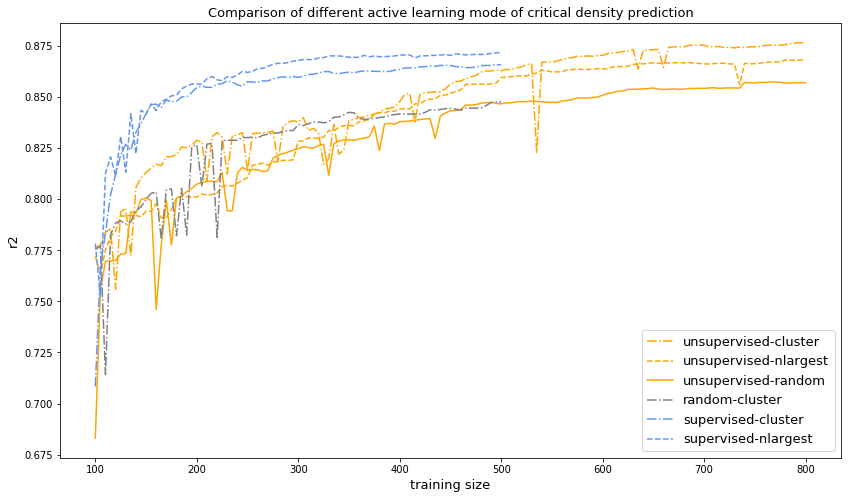

In [7]:
fig = plt.figure(figsize=(14,8))
for oh in oh_list:
    plot_oh(oh, get_str, 'r2')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('r2', fontsize=fontsize)
plt.title('Comparison of different active learning mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

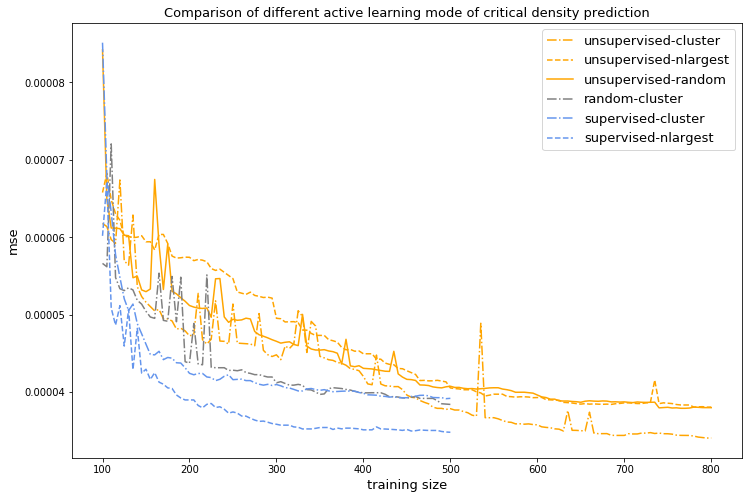

In [8]:
fig = plt.figure(figsize=(12,8))
for oh in oh_list:
    plot_oh(oh,  get_str, 'mse')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('mse', fontsize=fontsize)
plt.title('Comparison of different active learning mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

# comparison for different search size for unsupervised

In [9]:
out_list2 =  [ #'dc-unsupervised-random-200-5.out',
 #'dc-unsupervised-random-400-5.out',
 'dc-unsupervised-random-50-5.out',
 #'dc-unsupervised-random-0-5.out',
 'dc-unsupervised-cluster-0-5.out',
 'dc-unsupervised-cluster-200-5.out',
 'dc-unsupervised-cluster-400-5.out',
 'dc-unsupervised-cluster-50-5.out'
            ]

In [10]:
oh_list2 = [OutputHandler(i) for i in out_list2]

In [11]:
def plot_oh2(oh, get_str, target='r2'): # oh==OutputHandler
    if oh.add_mode == 'random':
        linestyle = '-'
    elif oh.add_mode == 'cluster':
        linestyle = '--'

    if oh.search_size == '0':
        color = 0
    else:
        color = (1-int(oh.search_size)**0.5 / 25)
    cmap=plt.get_cmap('autumn')
    plt.plot(oh.df['size'], oh.df[target], c=cmap(color), label=get_str(oh), linestyle=linestyle)
    
def get_str(oh):
    return ('%s-%s' % (oh.learning_mode, oh.add_mode) )

def get_str2(oh):
    return ('%s-search:%s-add:%s' % (oh.add_mode, oh.search_size, oh.add_size))

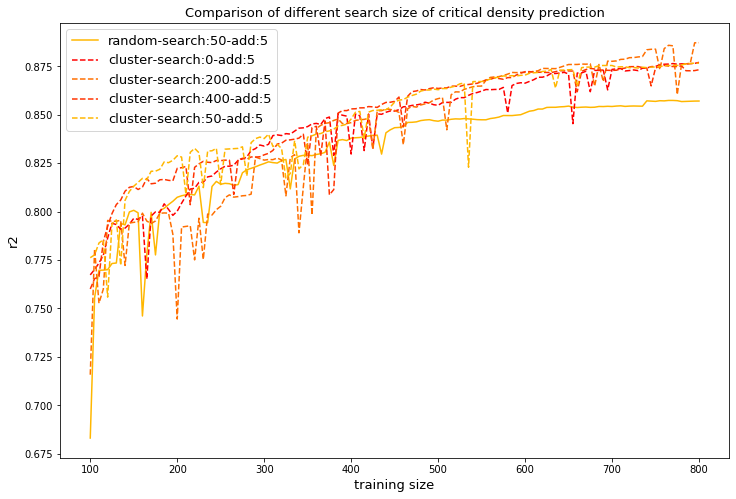

In [12]:
fig = plt.figure(figsize=(12,8))
for oh in oh_list2:
    plot_oh2(oh, get_str2, 'r2')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('r2', fontsize=fontsize)
plt.title('Comparison of different search size of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

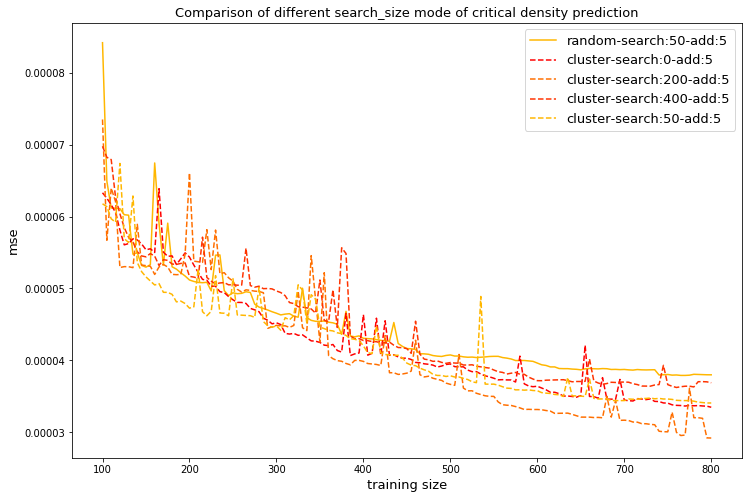

In [13]:
fig = plt.figure(figsize=(12,8))
for oh in oh_list2:
    plot_oh2(oh, get_str2, 'mse')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('mse', fontsize=fontsize)
plt.title('Comparison of different search_size mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

# comparison for different add size for unsupervised

In [14]:
out_list3 =  [ 
 'dc-unsupervised-cluster-200-10.out',
 'dc-unsupervised-cluster-200-40.out',
 'dc-unsupervised-cluster-200-5.out',
 #'dc-unsupervised-random-200-10.out',
 #'dc-unsupervised-random-200-2.out',
 #'dc-unsupervised-random-200-40.out',
 #'dc-unsupervised-random-200-5.out',
            ]
oh_list3 = [OutputHandler(i) for i in out_list3]

In [15]:
def plot_oh3(oh, get_str, target='r2'): # oh==OutputHandler
    if oh.add_mode == 'random':
        linestyle = '-'
    elif oh.add_mode == 'cluster':
        linestyle = '--'

    if oh.search_size == '0':
        color = 1
    else:
        color = int(oh.add_size)**0.5 / 6
    cmap=plt.get_cmap('autumn')
    plt.plot(oh.df['size'], oh.df[target], c=cmap(color), label=get_str(oh), linestyle=linestyle)
    
def get_str(oh):
    return ('%s-%s' % (oh.learning_mode, oh.add_mode) )

def get_str3(oh):
    return ('%s-search:%s-add:%s' % (oh.add_mode, oh.search_size, oh.add_size))

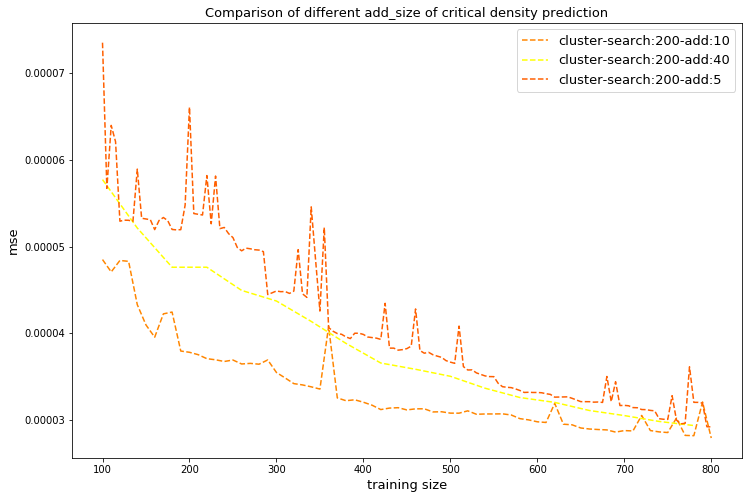

In [16]:
fig = plt.figure(figsize=(12,8))
for oh in oh_list3:
    plot_oh3(oh, get_str3, 'mse')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('mse', fontsize=fontsize)
plt.title('Comparison of different add_size of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)